# Logistic Regression 

## import library

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [194]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


In [195]:
print(num_data)

600


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [196]:
def linear_regression(theta, x, y):

    value = theta.T@x+y

    return value

## define sigmoid function with input $x$

In [197]:
def sigmoid(x):

    z = 1/(1+np.exp(-x))

    return z

## define loss function for the logistic regression

In [198]:
def compute_loss(x,y,label,theta):
    
    h = sigmoid(linear_regression(x,y,theta))
    loss=((-label * np.log(h)) - ((1-h) * np.log(1-h))).mean()
          
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [199]:
def compute_gradient(theta, x, y):
    m = y.size
    h = sigmoid(np.dot(x, y))
    #h.shape = (h.shape[0],1)
    gradient = (1.0/m) * np.dot(x.T,(h-y))
    #gradient.shape = (600,)
    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [200]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters


## iterations for the gradient descent

In [201]:
theta_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)
iteration = np.zeros(num_iteration)

for i in range(num_iteration):
    theta = learning_rate * compute_gradient(theta,point_x,point_y)
    loss = compute_loss(point_x,point_y,label,theta)

    iteration[i] = i
    theta_iteration[i] = theta
    loss_iteration[i]  = loss

ipykernel_launcher:3: RuntimeWarning: overflow encountered in exp
ipykernel_launcher:4: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:4: RuntimeWarning: invalid value encountered in multiply


In [202]:
f = theta * point_x+point_y

## plot the results

In [203]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [204]:
def plot_data(x, y, label):
    
    plt.figure(figsize=(8,8))

    plt.title('training data')

    plt.plot(x, 'p', color='blue')
    plt.plot(y, 'p', color='red')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [205]:

def plot_model_parameter(iteration, theta_iteration, loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    plt.plot(iteration, '-', color='green')
    plt.plot(theta_iteration, '-', color='red')
    plt.plot(loss_iteration, '-', color='blue')

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [206]:
def plot_classifier(x,y):

    plt.plot(x, 'p', color='blue')
    plt.plot(y, 'p', color='red')

    #plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

No handles with labels found to put in legend.


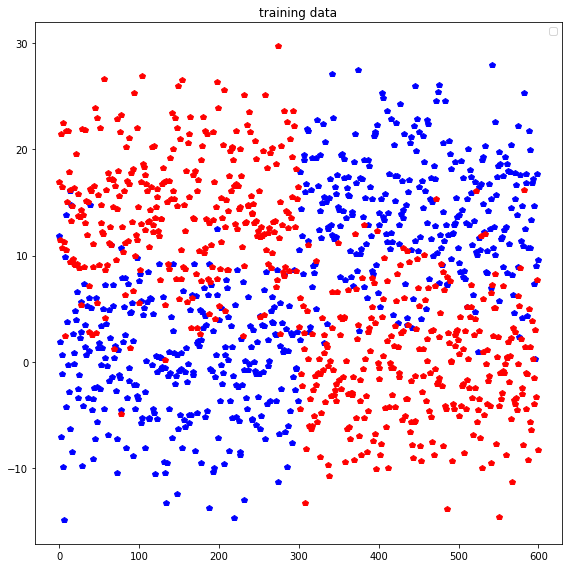

In [207]:
plot_data(point_x, point_y, label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

No handles with labels found to put in legend.


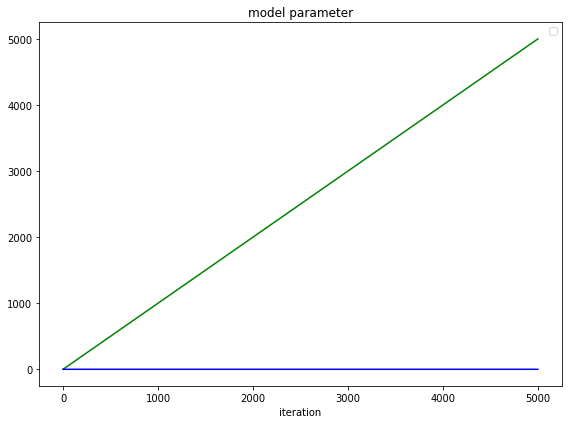

In [208]:
plot_model_parameter(iteration, loss_iteration, theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

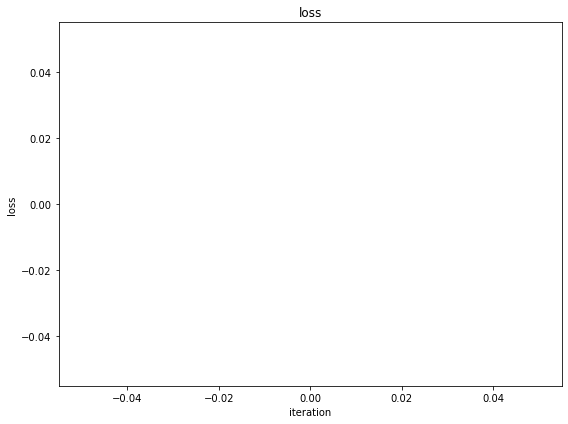

In [209]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

No handles with labels found to put in legend.


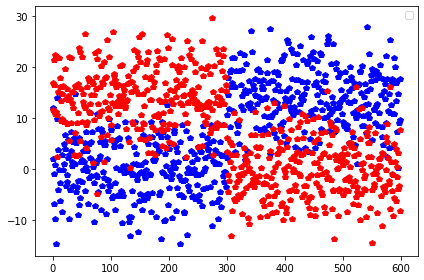

In [210]:
plot_classifier(point_x, point_y)